In [1]:
import json

# Computing

Its all about algorithms and data structures. Some problems are from google tech dev guide, some from interviews and elsewere.

## Decompress a compressed string

print a codified String of the form `number[String]*`, where String can again be equal to `number[String]*`.

Code snippet was for python2.X so had to change `xrange` for `range`, do some indentation and change `basestring` to `str`.

Learnt `yield` reserved word and `sys.stdout.write()`.

In [40]:
#!/usr/bin/env python
import sys
def decomp(text, start=0, times=1):
    """
    Iterate over and decompress the compressed string.
    This approach makes use of nested Python iterators, which is a very clean way
    of expressing expansion of nested iterated items.
    Args:
        text: The entire string to decompress.  It's unobvious, but nice
          to have the whole string plus an index; this allows any error
          detection code to report the absolute index of a problematic
          character.
        start: The starting index within 'text'.  We decompress from
          'start' up through the matching close-brace or end-of-string.
        times: The number of times to repeat decompression.
    """
    # Repeat iteration over our sub-chunk N times.
    for j in range(times):
        i = start
        # Until we hit the end of the string, or end of our chunk...
        while i < len(text) and text[i] != ']':
            # Emit letters as themselves.
            if text[i].islower():
                yield text[i]# If it's not a letter, it must be digit(s).  Convert to integer.
            else:
                sub_times = 0
                while text[i].isdigit():
                    sub_times = sub_times * 10 + int(text[i])
                    i += 1
                i += 1  # Skip past open-bracket
                # Start an iterator over the sub-chunk.
                for item in decomp(text, i, sub_times):
                    # Iterator generates many characters, and then at the very end,
                    # it generates an integer.  Provide characters up to our caller,
                    # and use the integer to advance our index 'i' to end-of-chunk.
                    if isinstance(item, str):
                        yield item
                    else:
                        i = item
                # Advance 'i' to the next letter, or skip the close-bracket, whichever.
            i += 1
    # Don't emit the trailing integer if we are doing the outermost call.  This
    # test could be moved to the decompress() call instead; we would check there
    # to see if the result item was basestring or int, just as we do above, but
    # I suspect that check would be more expensive than a simple integer
    # comparison here, where the type is known.
    if start > 0:
        yield i
def decompress(text):
    # We could wrap 'text' to add a leading '1[' and trailing ']' to allow a
    # little bit of simplification in the logic in decomp(), but the
    # simplification would lead to harder-to-read code, as well as requiring
    # O(n) additional time, and a temporary requirement for O(n + 3) additional
    # space during the copy operation.
    #
    # This is O(decompressed-length) for speed (probably), and up to
    # O(compressed-length/4) for additional storage.  In this implementation,
    # the storage requirement is well-disguised: It appears on the function call
    # stack, rather than in declared variables.  E.g., consider a worst-case
    # input of: 1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[1[xx]]]]]]]]]]]]]]]]]]]]
    # which would require a stack depth of 20.
    #
    # The (probably) for the big-O depends on how well Python implements
    # resumption of nested iteration.  At worst, the string above would require
    # a full stack descent, then ascent for *each* of the two 'x' characters,
    # for a total of O(n^2) time.  Another very well-hidden possible cost.
    for letter in decomp(text):
        print(letter)

In [41]:
decompress('3[abc]4[ab]c')

a
b
c
a
b
c
a
b
c
a
b
a
b
a
b
a
b
c



## Openning JSON file

Not sure if it goes in this notebook hehe.

In [2]:
with open('personasdesaparecidas.json','r',encoding='utf8') as f:
    datastore=json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'personasdesaparecidas.json'

## Facebook interview question

If I remember well it was about i times printing the product of all list items except the one on i position.

In [62]:
def prints_products(list_in):
    mult=1
    num_zeros=0
    idx=0
    
    for i in range(len(list_in)):
        if(list_in[i]==0 and num_zeros==0):
            idx=i
            num_zeros+=1
        elif(list_in[i]==0 and num_zeros==1):
            num_zeros+=1
            break
        else:
            mult*=list_in[i]
    if(num_zeros==1):
        for i in range(len(list_in)):
            if i==idx:
                print(mult)
            else:
                print('0')
    elif(num_zeros>=2):
        for i in range(len(list_in)):
            print('0')
    else:   
        for i in range(len(list_in)):
            print(mult/list_in[i])

In [65]:
prints_products([1,7,3,9,5,6])

5670.0
810.0
1890.0
630.0
1134.0
945.0


## Find longest subsequence of S from a list D.
[link](https://techdevguide.withgoogle.com/paths/foundational/find-longest-word-in-dictionary-that-subsequence-of-given-string#!)

I tried a good approach through a greedy algorithm however I could easily improve it if I could order D and try the subsequences as they become shorter, the first found is the answer.

There are other answers that attempt to look for the appearances of the words and then look from there. Efficient binary search can improve them even more.

I copied the snippet code provided however the indents are wrong and its running python2.X I think.



In [110]:
def longest_subsequence(S,D):
    maxi=''
    while D:
        S2=D.pop()
        if is_S2_a_subsequence_of_S(S,S2) and len(maxi)<len(S2):
            maxi=S2
    return maxi
def is_S2_a_subsequence_of_S(S,S2):
    j=0
    i=0
    while i<len(S) and j<len(S2):
        if S[i]==S2[j]:
            j+=1
        i+=1
    if j==len(S2):
        return True
    else:
        return False

In [111]:
is_S2_a_subsequence_of_S(S,D.pop())

KeyError: 'pop from an empty set'

In [112]:
S = "abppplee"
D = {"able", "ale", "apple", "bale", "kangaroo","abppplee"}

In [113]:
longest_subsequence(S,D)

'abppplee'

In [128]:
#!/usr/bin/env python
import collections
import sys
def find_longest_word_in_string(letters, words):
    letter_positions = collections.defaultdict(list)
    # For each letter in 'letters', collect all the indices at which it appears.
    # O(#letters) space and speed.
    for index, letter in enumerate(letters):
        letter_positions[letter].append(index)
    # For words, in descending order by length...
    # Bails out early on first matched word, and within word on
    # impossible letter/position combinations, but worst case is
    # O(#words # avg-len) * O(#letters / 26) time; constant space.
    # With some work, could be O(#W * avg-len) * log2(#letters/26)
    # But since binary search has more overhead
    # than simple iteration, log2(#letters) is about as 
    # expensive as simple iterations as long as 
    # the length of the arrays for each letter is
    # “small”.  If letters are randomly present in the
    # search string, the log2 is about equal in speed to simple traversal
    # up to lengths of a few hundred characters.         
    for word in sorted(words, key=lambda w: len(w), reverse=True):
        pos = 0
        for letter in word:
            if letter not in letter_positions:
                break
            # Find any remaining valid positions in search string where this
            # letter appears.  It would be better to do this with binary search,
            # but this is very Python-ic.
            possible_positions = [p for p in letter_positions[letter] if p >= pos]
            if not possible_positions:
                break
            pos = possible_positions[0] + 1
                # We didn't break out of the loop, so all letters have valid positions  
        else:  
            return word
            
find_longest_word_in_string(S,D)

In [130]:
S = "abppplee"
D = {"able", "ale", "apple", "bale", "kangaroo"}
find_longest_word_in_string(S,D)

'apple'

## Sum nums

Is about summing the numbers in a string that can be separated by anything that is not a number. Implemented with regex.

```java
public int sumNumbers(String str) {
  str=str.replaceAll("\\D+"," ");
  str = str.replaceAll("( )+", " ");
  String[] arrOfStr = str.split(" ");
  int sum=0;
  for (String a : arrOfStr)
      if (a!="" && !a.equals(""))
      sum+=Integer.parseInt(a);
  return sum;
}
```

In [420]:
import re
s='1234 234234 asdfasdf 23434 234234    43652345,2345,3452345'
l=re.split('\D+',s)
print(l)
nums=[]
[nums.append(int(num)) for num in l if num != '']
print(sum(nums))


['1234', '234234', '23434', '234234', '43652345', '2345', '3452345']
47600171


## Design an explosion mining game.

Given $n$, design $n*n$ matrix `terrain`, with $m$ **mines**, $terrain[i,j]$ is the value of adjacent mines of position `[i,j]`.

* A **mine** is a list of the form $[i,j]$ where $0 \geq i,j \leq n$, `mines` is a list of $m$ **mines** objects.
* `terrain[i,j]` is the sum of all mines over a $3*3$ subkernel of terrain centered in $0\geq$ `[i,j]` $\leq 9$.
* $m \leq n*n$

In [301]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm



In [390]:
60*60

3600

In [408]:
N=60
terrain=np.zeros((N+20,N+20))
remaining_mines = 1000
remaining_cells = N*N
mines=[]
frames=[]
fig,ax=plt.subplots(figsize=(5,5))
for k in tqdm(range(0, N*N)):
    chance = float(remaining_mines) / remaining_cells
    if random.uniform(0., 1.) < chance: 
        i,j=np.unravel_index(k,(N,N))
        mine=[i+10,j+10]
        mines.append(mine)
        terrain[mine[0]-1:mine[0]+2,mine[1]-1:mine[1]+2]=terrain[mine[0]-1:mine[0]+2,mine[1]-1:mine[1]+2]+1
        remaining_mines -= 1 
        if (len(mines)%10==0):
                ax.imshow(terrain.T,cmap='magma',aspect='auto')
                ax.axis('off')
                fig.canvas.draw()       # draw the canvas, cache the renderer
                image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
                image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
                frames.append(image)
                plt.close()

    remaining_cells -= 1
imageio.mimsave('minas.gif', frames)

In [318]:
n=100
m=2000
mines=[]
terrain=np.zeros((n+20,n+20))
frames=[]

fig,ax=plt.subplots(figsize=(5,5))
pbar = tqdm(total=m)
while (len(mines)<m):
    mine=random.sample(range(10, n+10),2)
    if mine not in mines:
        terrain[mine[0]-5:mine[0]+6,mine[1]-5:mine[1]+6]=terrain[mine[0]-5:mine[0]+6,mine[1]-5:mine[1]+6]+1
        mines.append(mine)
        if (len(mines)%10==0):
            ax.imshow(terrain.T,cmap='magma')
            ax.axis('off')
            fig.tight_layout()
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            frames.append(image)
            plt.close()
            pbar.update(10)
imageio.mimsave('minas.gif', frames)

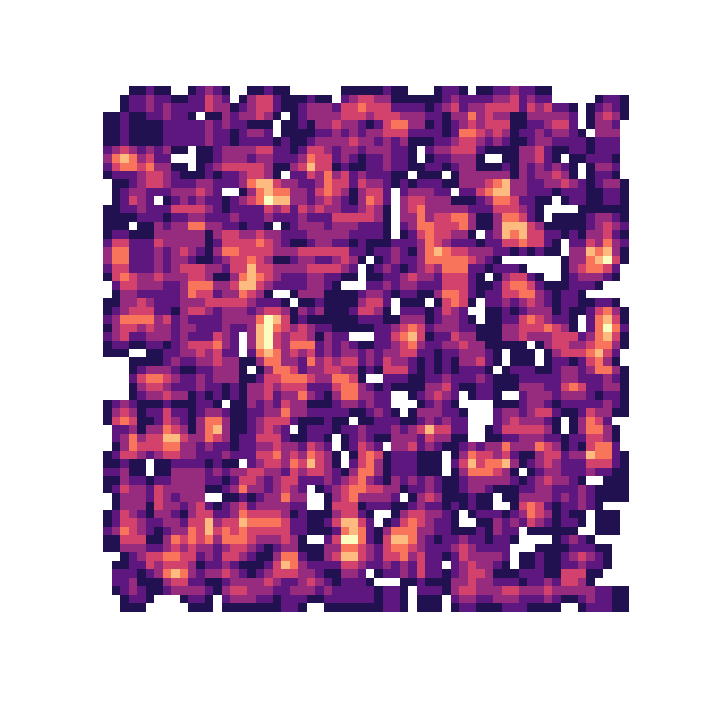

In [417]:
cmap = plt.get_cmap('magma')
rgba_img = (cmap(terrain / np.max(terrain)) * 255).astype(np.uint8)

# Set alpha channel to 0 for all 0 values in terrain
rgba_img[:, :, 3] = (terrain > 0) * 255

# Output with transparency
plt.figure(0, figsize=(10, 10))
plt.imshow(rgba_img)
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png', transparent=True)


### Print the span of the longest inclusive array that has the same values at its borders.

In [ ]:
def maxSpan(arr):
    maxi=0
    for i,num1 in enumerate(arr ):
         for j,num2 in enumerate(arr[i:]):
                if num1==num2 and j+1>maxi:
                    maxi=j+1
    return maxi

In [ ]:
arr=[1, 2, 1, 1, 3]
maxi=0
for i,num1 in enumerate(arr):
     for j,num2 in enumerate(arr[i:]):
            if num1==num2 and j>=maxi:
                maxi=j+1
print (maxi)

## Map a values to b and erase c

``` p
mapShare({"a": "aaa", "b": "bbb", "c": "ccc"}) → {"a": "aaa", "b": "aaa"}

mapShare({"b": "xyz", "c": "ccc"}) → {"b": "xyz"}

mapShare({"a": "aaa", "c": "meh", "d": "hi"}) → {"a": "aaa", "b": "aaa", "d": "hi"}
```

In [421]:
def mapShare(dic):
    if dic.get("a"):
        dic["b"]=dic.get("a")
    dic.pop("c")
    return dic

In [422]:
mapShare({"a": "aaa", "b": "bbb", "c": "ccc"}) 

{'a': 'aaa', 'b': 'aaa'}